<a href="https://colab.research.google.com/github/DeboraID/BasicsTips-Links/blob/master/_JoyTunes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Assigment
@JoyTunes

## Import packages

In [21]:
#import packeges 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# Models
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)


-------------------------


## Upload files 

In [22]:
from google.colab import files

uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

Saving BI_Home_Assignment_SP_Funnels.csv to BI_Home_Assignment_SP_Funnels (1).csv
Saving BI_Home_Assignment_.docx to BI_Home_Assignment_ (1).docx
Saving Table_1.png to Table_1 (1).png


## Question number 1:

Following is the behavior of monthly subscribers retention by month. 
% retention means how many of the active subscriber renew their subscription on the Xth months (i.e. 70% of the subscribers renew on their first renewal date after one month, then 80% of the remaining will continue to renew on the 2nd month etc.)

A subscription price is $10/month.






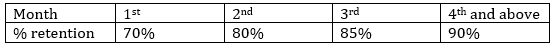

In [23]:
from IPython.display import Image
Image('Table_1.png')

### a)	Why do you think the 1st month retention is the lowest?

Is the first month free or the first basic sessions are free? So everyone starts learning until they need to pay, only the engaged people keep learning. It could be that the marketing dep should fine-tune the target population of the campaigns or that there should be enhenced the engagement of the first month / sessions .

### b)	What’s the average revenue from a subscriber during his 1st year of subscription?

the average revenue from one subcriber will be 10 per month


### c)	Marketing dept. wants to run a campaign offering users just after they subscribe a 50% discount if they commit for a year. Would you advise for or against this plan?

It is not going to help with the 230% of the churnres

## ## Question number 2:
Given an sql table of soccer matches results, write an SQL query to construct the league standings. 

In [192]:
#create Soccer matches table by pandas
columns = ['HomeTeam' ,	'AwayTeam' ,	'HomeScore'	, 'AwayScore']
data = [['Argentina',	'Nigeria',	2	, 0 ],
            ['Germany' ,	'Japan',	1,	1 ], 
            ['Japan',	'Argentina',	0	,1], 
            ['Germany',	'Nigeria',	2	,3],
            ['Nigeria',	'Japan',	0	,0],
            ['Germany',	'Argentina',	1	,0]]

matches = pd.DataFrame(data,columns= columns)
matches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
HomeTeam     6 non-null object
AwayTeam     6 non-null object
HomeScore    6 non-null int64
AwayScore    6 non-null int64
dtypes: int64(2), object(2)
memory usage: 272.0+ bytes


Pointing rules:
-	Team gets 3 points for a win, 1 point for tie, 0 points for loss
-	Team positions determined by number of points, if tied position is determined by the better “goal difference” meaning Goals Scored minus Goals received. 

In [193]:
# with python 

def calc (x,y):
    if x > y  :
        return 3
    elif  x == y:
        return 1
    else:
        return 0
    
matches['Hometeam_scoring']= matches.apply(lambda x: calc(x.HomeScore, x.AwayScore), axis=1)
matches['Awayteam_scoring']= matches.apply(lambda x: calc(x.AwayScore, x.HomeScore), axis=1)

matches


,HomeTeam,AwayTeam,HomeScore,AwayScore,Hometeam_scoring,Awayteam_scoring
0,Argentina,Nigeria,2,0,3,0
1,Germany,Japan,1,1,1,1
2,Japan,Argentina,0,1,0,3
3,Germany,Nigeria,2,3,0,3
4,Nigeria,Japan,0,0,1,1
5,Germany,Argentina,1,0,3,0


In [229]:
ranking= matches.groupby(['HomeTeam'])['Hometeam_scoring','HomeScore','AwayScore'].sum()
ranking_= matches.groupby(['AwayTeam'])['Awayteam_scoring','AwayScore','HomeScore'].sum()

ranking.rename(columns={'AwayScore':"Home_recieved"} ,inplace=True)
ranking_.rename(columns={'HomeScore':"Away_recieved"} ,inplace=True)


ranking_

,Awayteam_scoring,AwayScore,Away_recieved
AwayTeam,,,
Argentina,3,1,1
Japan,2,1,1
Nigeria,3,3,4


In [230]:
ranking['Awayteam_scoring']= 0
ranking['AwayScore']= 0
ranking['Away_recieved']= 0
ranking_.index.rename("HomeTeam" ,inplace=True)

ranking.update(ranking_)

ranking

,Hometeam_scoring,HomeScore,Home_recieved,Awayteam_scoring,AwayScore,Away_recieved
HomeTeam,,,,,,
Argentina,3,2,0,3.0,1.0,1.0
Germany,4,4,4,0.0,0.0,0.0
Japan,0,0,1,2.0,1.0,1.0
Nigeria,1,0,0,3.0,3.0,4.0


In [233]:

ranking['Scored'] = ranking['AwayScore'] + ranking['HomeScore']
ranking['Received'] =ranking['Home_recieved'] + ranking['Away_recieved']
ranking['GoalDiff'] = ranking['scored'] - ranking['Received'] 
ranking['Points'] = (ranking['Hometeam_scoring'] + ranking['Awayteam_scoring']).astype(int)

ranking.drop(columns=['Hometeam_scoring','HomeScore','Home_recieved','Awayteam_scoring','AwayScore','Away_recieved']).sort_values(by='points', ascending=False)

,points,scored,Received,GoalDiff,Scored,Points
HomeTeam,,,,,,
Argentina,6,3.0,1.0,2.0,3.0,6
Germany,4,4.0,4.0,0.0,4.0,4
Nigeria,4,3.0,4.0,-1.0,3.0,4
Japan,2,1.0,2.0,-1.0,1.0,2


In [0]:
# create Ranking tables by SQL
CREATE TABLE (
                select 
                  (distinc (HomeTeam)) as [Team] ,
                   (CASE WHEN HomeScore >  > 3 THEN 3 WHEN GD < - 3 THEN - 3 ELSE GD END AS [MaxGD], CASE WHEN W = 1 THEN 3 WHEN D = 1 THEN 1 ELSE 0 END AS [Points]
    team, 
    count(*) MP, 
    (case when HomeScore > AwayScore then 3 else case when HomeScore = AwayScore then 1 end ) as [Scored_1],
    from #tmp join HomeTeam on team= HomeTeam
                   
    where team = 
    sum (case when HomeScore < AwayScore then 1 end) Loss,
    sum(fthg) GF,
    sum(ftag) GA,
    sum(fthg) - sum(ftag) GD,
    sum(case when fthg > ftag then 3 else 0 end + case when fthg = ftag then 1 else 0 end) Pts
    from (
    select Div, hometeam team, fthg, ftag, hthg, htag from Matches 
      union all
    select Div, awayteam team, ftag, fthg, htag, hthg from Matches 
    ) a
    where div='E0'
group by team
order by Pts desc